## K-nearest neighbors (KNN)

In this project we will do digit recognition. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you've learned can be used for this classification task. 

#### 1 Dataset: 
You are given a data set in digit_dataset.csv that contains 3000 training examples of handwritten digits. You can read the digit_dataset.csv using the pandas pd.read_csv. There are 3000 training examples in digit_dataset.csv, where the first column is the label and the rest of the training example are 28 pixels by 28 pixels gray scale image of the digit. Each pixel is represented by a floating point number indicating the gray scale intensity at that location. The 28 by 28 grid of pixels is "unrolled" into a 784-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 3000 by 784 matrix X where every row is a training example for a handwritten digit image. 

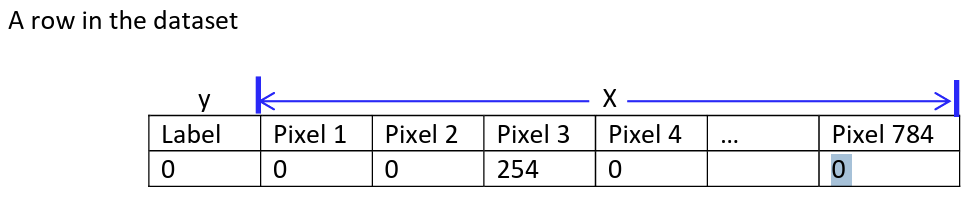


In [1]:
# Import libraries numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Read the data set: digits_recognition.csv:

# Read the data file: 'digits_recognition.csv'
# use pd.read_csv and include header = None as a second parameter.
data = pd.read_csv('digits_recognition.csv', header=None)

In [3]:
# Extract the feature vector X and the output label y
# ----- Important ----- Note the output label y is at column 0
# ----- Important ----- the feature vector X starts from column 1 to the last column
y = data.iloc[:, 0]      # Labels are in the first column
X = data.iloc[:, 1:]     # Features are from column 1 to the end


#### 2. Visualization:  
You can randomly visualize some of the images in the data set by typing the following code in the next cell: 

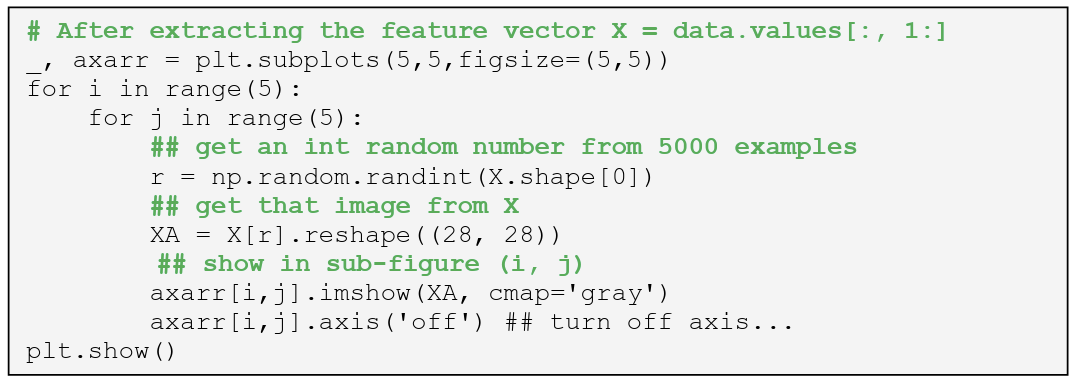

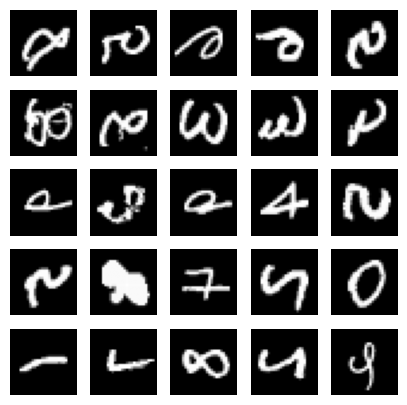

In [4]:
# Type in the code that draw a sample of the digits from the feature vector
# Note: copy and paste the code in the text document associated with this project
_, axarr = plt.subplots(5, 5, figsize=(5, 5))
for i in range(5):
    for j in range(5):
        # Get a random index from the dataset
        r = np.random.randint(X.shape[0])
        # Get the corresponding image and reshape it to 28x28
        XA = X.iloc[r].values.reshape((28, 28), order='F')
        # Display the image
        axarr[i, j].imshow(XA, cmap='gray')
        axarr[i, j].axis('off')  # Turn off axes 
plt.show()

#### 1.3 Missing values, outliers and scaling: 
Check for missing values and ignore outliers as these are images taken from camera, so outliers are not possibly to occur. Finally, scale your data by dividing all feature vector X by the range (that is max – min) only, no need to subtract the mean. 

In [5]:
# Scale the feature vector by the range, that is 255
X = X / 255.0

#### 1.4 Split your data into train and test sets. 
Split your data set into Xtrain, Xtest, ytrain and ytest using train_test_split in the sklean.model_selection library and use test_size=0.2. 

In [6]:
## Type the code for data split into train and test.
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.5 Data set class labels: 
In this data set you have images for digits from 0 to 9. The target is a multi-class {0, 1, 2, 3, 4, 5,  6, 7, 8, 9}. You have to implement KNN algorithm that can classify images to their 
corresponding digit.

In [7]:
# Split the feature vector and output label into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.6 Training using KNN algorithm 
Use a loop to try different values of k and find the best value of k with minimum test (generalization) error. Do not exceeds k = 12 as it will take long time to complete. 

In [ ]:
# Use the K nearest neighbor algorithm with different values of K
# find the best K with minimum test error
# Make sure to print the training accuracy and the test accuracy using the accuracy_score function

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k = 1
best_accuracy = 0

for k in range(1, 13):  # Try k from 1 to 12
   
    knn = KNeighborsClassifier(n_neighbors=k)
    
   
    knn.fit(X_train, y_train)
    
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
 
    print(f'k = {k}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}')
    
 
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

print(f' Best k: {best_k} with Test Accuracy = {best_accuracy:.4f}')

k = 1: Train Accuracy = 1.0000, Test Accuracy = 0.9150
k = 2: Train Accuracy = 0.9487, Test Accuracy = 0.9033
k = 3: Train Accuracy = 0.9567, Test Accuracy = 0.9133
k = 4: Train Accuracy = 0.9442, Test Accuracy = 0.9033
k = 5: Train Accuracy = 0.9433, Test Accuracy = 0.9033
k = 6: Train Accuracy = 0.9387, Test Accuracy = 0.9083
k = 7: Train Accuracy = 0.9392, Test Accuracy = 0.9000
k = 8: Train Accuracy = 0.9346, Test Accuracy = 0.8983
k = 9: Train Accuracy = 0.9333, Test Accuracy = 0.9000
k = 10: Train Accuracy = 0.9250, Test Accuracy = 0.8967
k = 11: Train Accuracy = 0.9242, Test Accuracy = 0.8917
k = 12: Train Accuracy = 0.9221, Test Accuracy = 0.8883
 Best k: 1 with Test Accuracy = 0.9150


### 1.7 Submission: 
Submit your [LastName]_KNN.ipyn code through Canvas for grading. 
### 1.8 Grading criteria: 
* The data set is read correctly. 
* Feature vector and output label are extracted correctly. 
* Visualize of the sample digits. 
* Check for missing values 
* Scaling of feature vector is done correctly. 
* Splitting the data into train and test set. 
* Program works correctly with no errors.  
* Program finds the best value of k that does not lead to under-fit or over-fit. 
* The use of knn accuracy_score method to present the accuracy of every k tried in your code.